# This notebook contains the implementation of a neural network from scratch using python without any frameworks.

## 0. Importing Necessary libraries  

In [ ]:
import numpy as np
import math as mt
from scipy.special import expit
import matplotlib.pyplot as plt

## 1. loading of data

In [ ]:
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if the above graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6, w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

## Forward propagation

In [ ]:
def Forward_propagation (X, y, W):
    '''Input :: Takes in a datum X and its label y ,with the randomly initialized weight vector W
       Returns  :: A dictionary holding intermediate variables along with the y_hat(predicted value) and the Loss during forward propagation
    '''
    import math as mt 
    
    neural_network = dict()                                  # empty dict 
    neural_network['a'] =  W[0] * X[0]
    neural_network['b'] =  W[1] * X[1]
    neural_network['c'] =  (neural_network['a'] + neural_network['b']) ** 2     
    neural_network['d'] =  neural_network['c'] + W[5]
    neural_network['e'] =  mt.exp (neural_network['d'])
    neural_network['f']  =  neural_network['e'] + W[6]
    neural_network['g'] =  mt.tanh( neural_network['f'] )                          # output of the upper graph.                
    
    neural_network['h'] =  W[2]*X[2]
    neural_network['i']  =   W[3] * X[3]
    neural_network['j']  =  W[4] * X[4]
    neural_network['k'] =  mt.sin( neural_network['h'] )
    neural_network['l']  =   neural_network['i'] + neural_network['j']
    neural_network['m'] =  neural_network['k'] * neural_network['l'] 
    neural_network['n'] =   neural_network['m'] + W[7] 
    neural_network['o'] =   expit( neural_network['n'] )                              # Expit is the sigmoid implementation in scipy.
    neural_network['p'] =   neural_network['o']  * W[8]                             # output of the lower graph.
    
    neural_network['y_hat'] =  neural_network['g'] +  neural_network['p']               # Final values, i.e prediction from upper and lower combined.
    neural_network['loss'] = pow ( (y - neural_network['y_hat']  ), 2   )
    neural_network['diff_loss_1'] = -2 * (y - neural_network['y_hat'] )                      # derivative of the loss
    
    return  neural_network
    

## Backward propagation via partial derivatives

In [ ]:
def Backward_propagation(dictionary , X, y, W):
    '''Input :: Takes in a dictionary that holds the intermediate values, loss and prediction of a network 
                     during forward propagation, a datum with its label, along with the randomly initialized weight vector.
      Returns ::  Returns a list of gradient  values as a result of backpropagation.
    '''
    dw9 = dictionary['diff_loss_1'] * dictionary['o']
    dw8 = dictionary['diff_loss_1'] * W[8] * dictionary['o'] * (1 - dictionary['o'] )                                                                                
    dw7 = dictionary['diff_loss_1'] * ( 1 - pow( dictionary['g'], 2))
    dw6 = dictionary['diff_loss_1'] * ( 1 - pow( dictionary['g'], 2) ) * dictionary['e']
    dw5 = dictionary['diff_loss_1'] * W[8] *  dictionary['o']* ( 1 - dictionary['o']) * dictionary['k'] * X[4]
    dw4 = dictionary['diff_loss_1']* W[8] * dictionary['o'] * (1 - dictionary['o'] ) * dictionary['k'] * X[3]
    dw3 = dictionary['diff_loss_1'] * W[8] * dictionary['o'] * (1 - dictionary['o']) * dictionary['l'] * mt.cos( dictionary['h'] ) * X[2]

    dw2 = dictionary['diff_loss_1'] * ( 1 - pow(dictionary['g'], 2) ) * dictionary['e'] * ( 2 * ( dictionary['b'] + dictionary['a'] ) * X[1]  )             
    dw1 = dictionary['diff_loss_1'] * (1 - pow(dictionary['g'], 2)) * dictionary['e'] * ( 2 * ( dictionary['b'] + dictionary['a'] ) * X[0]  )             

    return [dw1, dw2, dw3, dw4, dw5, dw6, dw7 ,dw8, dw9 ]
    

## Gradient check wrt numerical methods

In [ ]:
def gradient_check (w, epsilon, Xi, yi, forward_prop_func):
    '''
    Inputs :: Takes in a randomly initialized weight vector, a small value epsilon for calculating limits, datum with its label, and the 
                    Forward propagation Function
    Returns :: The gradient check list with the error between approximated and one found with backpropagation, and the list of approximated gradients.
    '''
    approx_grad = []                  
    gradient_check_list = []
    
    for i in range(len(w)):
        
        w_1 = w[:]                                # Making a copy of the weight vector
        w_1[i] += epsilon                     # adding small value (epsilon) to it 
        t1= forward_prop_func(Xi,yi, w_1)['loss']                 # Getting the loss from the forward propagation
        
        w_2 =w[:]                               # Making a second copy of the weight vector
        w_2[i] -= epsilon                  # subtracting epsilon in order to calculate the approx gradient
        t2 = forward_prop_func(Xi,yi, w_2)['loss']               # Getting the loss from the forward propagation
        
        grad_by_limit= (t1 - t2)/(2 *epsilon)                  # calculate the gradient by approximation 
        approx_grad.append(grad_by_limit)
        
         # calculate the error b/w approx and one with backpropagation
        grad_chk = np.linalg.norm( dw[i] - grad_by_limit   )/ (np.linalg.norm( dw ) + np.linalg.norm(grad_by_limit))           
        
        gradient_check_list.append(grad_chk)             # append the results to a list 

    return gradient_check_list, approx_grad


In [ ]:
w = np.random.normal(loc = 0, scale = 0.01, size = 9)              # Initialize weights on normal distribution
w = list(w)

tmp_dict = Forward_propagation(X[0],y[0], w)                          # perform forward propagation and backward propagation
dw = Backward_propagation(tmp_dict, X[0], y[0], w)

chk, apprx_grad_lst = gradient_check(w, 0.0001, X[0], y[0], Forward_propagation)                  #  perform gradient checking 

print('*** ** *** ' * 15)
print('*** ** *** ' * 15)
print(f'The gradients as a result of Backpropagation are :: {dw}\n' )

print(f'The approximate gradients are  :: {apprx_grad_lst}')
print('*****' * 25)
print('*****' * 25)
print(f'The result of gradient checking i.e the errors are in the  range {chk}' ) 
print('*** ** *** ' * 15)
print('*** ** *** ' * 15)

*** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** 
*** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** *** ** *** 
The gradients as a result of Backpropagation are :: [-0.014280455552480654, -0.001330719477653175, -1.0400818969452213e-05, 2.2482721607339203e-05, 4.8640270899566355e-06, -0.9184022666562436, -0.9229545820366094, -0.010384615586160374, -1.0959015491822777]

The approximate gradients are  :: [-0.014280455339354958, -0.0013307194779432763, -1.0400817984645983e-05, 2.248272235050308e-05, 4.864028069206938e-06, -0.9184022643649037, -0.9229545870070854, -0.010384615577452294, -1.0959015491829316]
*****************************************************************************************************************************
********************************************

### Experiment the network with different Optimizers


In [ ]:
W = np.random.normal(loc = 0,scale =  0.01, size=9)                      # initialize weights randomly 
W1 = np.copy(W)       # Make three copies of the same  weights in order to understand how each update rule performs 
W2 = np.copy(W)
W3 = np.copy(W)

##### Vanilla SGD

In [ ]:
alpha = 0.0005                    # learning rate
loss_lst = []                          # list to hold the loss

for each_epoch in range(100):                     # taking epochs as 100 
    for index in  range(len(X)):                         # for each datum
        
        tmp =  Forward_propagation(X[index], y[index], W1)                       # 1) Perform Forward propagation.
        dw = Backward_propagation(tmp, X[index], y[index], W1)              # 2) Perform Backward propagation.
        W1 -=  (alpha)*np.array(dw)                                                                  #3)  Update the weights.
    
    loss_lst.append( Forward_propagation(X[index], y[index], W1)['loss'] )            # append the loss for the graph
    #print(Forward_propagation(X[index], y[index], W)['loss'])

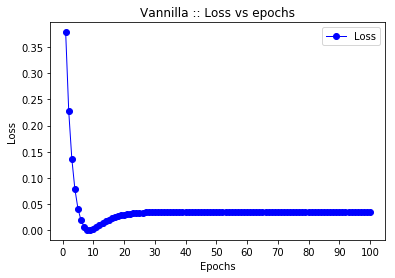

In [ ]:
# Plotting the loss vs Epoch

plt.plot(range(1,101), loss_lst, 'bo-',  linewidth=1, label = 'Loss')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Vannilla :: Loss vs epochs')
plt.legend()
plt.show();

##### SGD + momemtum

In [ ]:
# Resource ::  https://www.youtube.com/watch?v=hd_KFJ5ktUc
alpha = 0.0005                    # learning rate
loss_lst = []                          # list to hold the loss

mu = 0.8                              # Taking mu as constant
v = np.zeros_like(W2)       # initializing velocity to zero vector
 
for each_epoch in range(100):                     # taking epochs as 100 
    for index in  range(len(X)):                         # for each datum
        
        tmp =  Forward_propagation(X[index], y[index], W2)                       # 1) Perform Forward propagation.
        dw = Backward_propagation(tmp, X[index], y[index], W2)              # 2) Perform Backward propagation.
        v = (mu * v) -  (alpha)*np.array(dw)                                                      #  calculate velocity vector
        W2 +=v                                                                                                        # 3) Update the weights.
    
    loss_lst.append( Forward_propagation(X[index], y[index], W2)['loss'] )                  # append loss for plotting graph

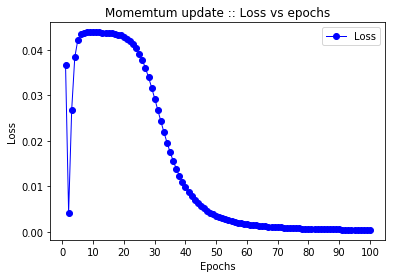

In [ ]:
# Plotting the loss vs Epoch
# sharp changes

plt.plot(range(1,101), loss_lst, 'bo-',  linewidth=1, label = 'Loss')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Momemtum update :: Loss vs epochs')
plt.legend()
plt.show()

##### Adam weight update rule

In [ ]:
alpha = 0.0005                    # learning rate
loss_lst = []                          # list to hold the loss

v = np.zeros_like(W3)        # m and v are  zerovectors 
m = np.zeros_like(W3)

beta1 = 0.9                         #  decaying the running average 
beta2 = 0.999
eps = 1e-8                         # to prevent Division from zero error

for each_epoch in range(50):
    for index in  range(len(X)):
        
        tmp =  Forward_propagation(X[index], y[index], W3)                       # 1) Perform Forward propagation.
        dw = Backward_propagation(tmp, X[index], y[index], W3)              # 2) Perform Backward propagation.
        
        m = beta1*m + (1-beta1)*np.array(dw)                                # calculate m , v and update the W3
        v = beta2*v + (1-beta2)*(np.array(dw)**2)
        W3 += - alpha * m / (np.sqrt(v) + eps)
    
    loss_lst.append( Forward_propagation(X[index], y[index], W3)['loss'])           # append the loss vector

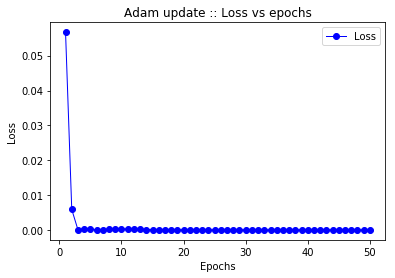

In [ ]:
# Plot the loss vs epoch graph
plt.plot(range(1,51), loss_lst, 'bo-',  linewidth=1, label = 'Loss')
plt.xticks(np.arange(0, 51, 10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Adam update :: Loss vs epochs')
plt.legend()
plt.show()

### References ::
1) https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.special.expit.html

2) https://stackoverflow.com/questions/28077733/numpy-sin-function-in-degrees

3) https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/

4) https://www.youtube.com/watch?v=hd_KFJ5ktUc

5) https://medium.com/deep-learning-demystified/https-medium-com-deep-learning-demystified-understanding-optimizers-313b787a69fe

6) https://www.youtube.com/watch?v=NfnWJUyUJYU&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC

7) https://hackernoon.com/how-to-interpret-a-contour-plot-a617d45f91ba